In [24]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import os, time, warnings
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras
from keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)
from sklearn import linear_model
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
audiofiles = '0001 0002 0003 0005 0006 0007 0008 0009 0010 0011 0012 0013 0014 0016 0017 0018 0019 0021 0022 0023 0024 0025 0026 0027 0028 0029 0030 0033 0036 0038 0039 0040 0041 0043 0044 R0001 R0002 R0003 R0004 R0005 R0006'.split()
for g in audiofiles: 
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/MyDrive/Colab Notebooks/Audio/{g}'):
        songname = f'./drive/MyDrive/Colab Notebooks/Audio/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [6]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [7]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
audiofiles = '0001 0002 0003 0005 0006 0007 0008 0009 0010 0011 0012 0013 0014 0016 0017 0018 0019 0021 0022 0023 0024 0025 0026 0027 0028 0029 0030 0033 0036 0038 0039 0040 0041 0043 0044 R0001 R0002 R0003 R0004 R0005 R0006'.split()

for g in audiofiles:
    all_files = os.listdir(f'./drive/MyDrive/Colab Notebooks/Audio/{g}')
    count = 0
    main_ls = []
    for filename in all_files:            
        songname = f'./drive/MyDrive/Colab Notebooks/Audio/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse=librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = [f'{g}'] + [np.mean(chroma_stft)] + [np.mean(rmse)] + [np.mean(spec_cent)] + [np.mean(spec_bw)] + [np.mean(rolloff)] + [np.mean(zcr)]    
        for e in mfcc:
            to_append += [np.mean(e)]
        
        if count == 0:
            main_ls = to_append.copy()
        

        else:
            for i in range(len(main_ls)):
                if type(main_ls[i]) != str:
                    main_ls[i] += to_append[i]
        
        if count == len(all_files) - 1:
            for i in range(len(main_ls)):
                if type(main_ls[i]) != str:
                    main_ls[i] /= len(all_files)

            file = open('dataset.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(main_ls)

        count += 1

In [13]:
import pandas as pd

file1 = "./drive/MyDrive/Colab Notebooks/Clinical report summary1.csv"
file2 = "./drive/MyDrive/Colab Notebooks/dataset (3).csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

req_col = df1["Score (By Roshan)"]
df1_req = req_col.to_frame()
final = pd.concat([df2, df1_req], axis = 1)

final.to_csv("out.csv", sep=',', encoding='utf-8',index = False)




In [8]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/out.csv')
column_names = list(df.columns)
input_names = column_names[1:len(column_names)-1]
target_name = column_names[len(column_names)-1]
X = df[input_names]      # slice dataFrame to extract input variables
y = df[target_name]        # slice dataFrame to extract target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = linear_model.LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
# Let's examine one sample and the corresponding predictions
print('----- Sample case -----')
last_sample = X_test.loc[list(X_test.index)[-1]]
print(last_sample)
last_sample_proba = y_pred_proba[-1]
print('Predicted class:',y_pred[-1])
print('Actual class:', y_test.loc[list(y_test.index)[-1]])

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

----- Sample case -----
chroma_stft              0.524563
rmse                     0.021700
spectral_centroid     1934.136262
spectral_bandwidth    2155.396838
rolloff               4092.878086
zero_crossing_rate       0.083239
mfcc1                 -294.318970
mfcc2                  112.352821
mfcc3                  -20.819294
mfcc4                    8.432621
mfcc5                   -3.687406
mfcc6                   27.544048
mfcc7                   10.694351
mfcc8                   24.399879
mfcc9                   -0.021242
mfcc10                   2.070498
mfcc11                  -4.738355
mfcc12                   6.006830
mfcc13                  -0.155122
mfcc14                   5.738367
mfcc15                  -3.650798
mfcc16                   1.761785
mfcc17                  -7.172286
mfcc18                   2.124814
mfcc19                  -7.598237
mfcc20                   3.221067
Name: 17, dtype: float64
Predicted class: 0
Actual class: 1
Accuracy: 0.5384615384615384


In [10]:
data = pd.read_csv('./drive/MyDrive/Colab Notebooks/out.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
data = pd.read_csv('./drive/MyDrive/Colab Notebooks/out.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = DecisionTreeClassifier()
scaler= scaler.fit(X_train, y_train)
X = scaler.fit(X_train,y_train)#Dividing data into training and Testing set
y_pred = scaler.predict(X_test)

In [14]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred))

accuracy: 0.5555555555555556


In [15]:
data = pd.read_csv('./drive/MyDrive/Colab Notebooks/out.csv')
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler2 = RandomForestClassifier(n_estimators = 100)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = scaler2.fit(X_train,y_train)#Dividing data into training and Testing set
y_pred = scaler2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.6666666666666666


In [16]:
extracted = pd.read_csv("./drive/MyDrive/Colab Notebooks/out.csv")

In [17]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted)
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df.pkl")
extracted_df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Score (By Roshan)
0,1,0.565861,0.022281,1703.719080,1934.714286,3598.276429,0.069320,-291.437663,129.907216,-29.658096,...,-4.397395,10.165448,-3.766543,1.905327,-2.050244,-1.451462,1.323928,-6.679996,4.077885,0
1,2,0.546660,0.018778,1820.537110,2160.577265,3971.932435,0.070869,-325.989583,113.997355,-6.808455,...,-1.006641,3.326997,1.409747,-4.764950,6.120515,-8.907910,6.669055,-8.699005,1.148498,1
2,3,0.623612,0.038940,1585.595607,1926.274165,3260.476118,0.073201,-272.266418,134.703995,-12.286455,...,-2.879927,0.787931,2.913886,-3.596879,7.417699,-7.031747,6.272591,-5.657873,2.299253,0
3,5,0.579702,0.015501,1701.144559,2112.134204,3633.688622,0.064113,-338.687541,123.087168,-5.791775,...,5.855888,0.156960,3.946133,-3.457018,5.443352,-4.967924,4.955185,-5.893994,2.310884,0
4,6,0.461592,0.023401,1657.059658,2104.226997,3663.833605,0.056428,-294.999115,125.892212,-4.460083,...,6.141882,-2.490677,4.333259,-5.884026,3.548912,-3.071364,2.603992,-5.268191,4.637352,0


In [18]:
final = pd.DataFrame(extracted)
X = (final[["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate", "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16", "mfcc17", "mfcc18", "mfcc19", "mfcc20"]])
print(X)
y = (final["Score (By Roshan)"])


    chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0      0.565861  0.022281        1703.719080         1934.714286  3598.276429   
1      0.546660  0.018778        1820.537110         2160.577265  3971.932435   
2      0.623612  0.038940        1585.595607         1926.274165  3260.476118   
3      0.579702  0.015501        1701.144559         2112.134204  3633.688622   
4      0.461592  0.023401        1657.059658         2104.226997  3663.833605   
5      0.578083  0.028093        2584.673517         2607.096631  5356.989605   
6      0.563999  0.019064        1454.523975         1824.660903  2996.133295   
7      0.571546  0.022448        2225.222280         2534.803387  5134.010863   
8      0.563200  0.021057        2206.137460         2344.277480  4746.966691   
9      0.576460  0.012911        2152.269027         2423.651816  4781.139754   
10     0.566171  0.020396        2015.882484         2265.234437  4379.727061   
11     0.572212  0.018145   

In [19]:
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

In [20]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])
print(X_test)
print(y_test)

Number of training samples =  32
Number of testing samples =  9
    chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
24     0.537557  0.014932        1570.440805         2138.239287  3450.887018   
13     0.542438  0.013616        1778.647805         2001.199636  3703.248440   
8      0.563200  0.021057        2206.137460         2344.277480  4746.966691   
25     0.544099  0.017285        1822.468044         2042.893917  3782.379114   
4      0.461592  0.023401        1657.059658         2104.226997  3663.833605   
40     0.603884  0.018004        2193.152656         2543.450134  5032.841916   
19     0.542983  0.016398        1991.202318         2244.625858  4269.671950   
39     0.582116  0.020564        2427.907478         2582.526350  5370.056414   
29     0.513172  0.018876        2416.158562         2602.332248  5424.232946   

    zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
24            0.044676 -363.349426  122.884979  

In [21]:
num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(None,32,26)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, None, 32, 1000)    27000     
                                                                 
 dense_5 (Dense)             (None, None, 32, 750)     750750    
                                                                 
 dense_6 (Dense)             (None, None, 32, 500)     375500    
                                                                 
 dense_7 (Dense)             (None, None, 32, 250)     125250    
                                                                 
 dense_8 (Dense)             (None, None, 32, 100)     25100     
                                                                 
 dense_9 (Dense)             (None, None, 32, 50)      5050      
                                                                 
 dense_10 (Dense)            (None, None, 32, 2)      

In [22]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [25]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250
1/1 [==============================] - 1s 893ms/step - loss: 29.8487 - accuracy: 0.6250 - val_loss: 157.1656 - val_accuracy: 0.2222
Epoch 2/250
1/1 [==============================] - 0s 48ms/step - loss: 121.1400 - accuracy: 0.3750 - val_loss: 13.9454 - val_accuracy: 0.7778
Epoch 3/250
1/1 [==============================] - 0s 49ms/step - loss: 19.8503 - accuracy: 0.6250 - val_loss: 139.2731 - val_accuracy: 0.2222
Epoch 4/250
1/1 [==============================] - 0s 54ms/step - loss: 107.6097 - accuracy: 0.3750 - val_loss: 17.9513 - val_accuracy: 0.2222
Epoch 5/250
1/1 [==============================] - 0s 55ms/step - loss: 14.0503 - accuracy: 0.3750 - val_loss: 35.1168 - val_accuracy: 0.7778
Epoch 6/250
1/1 [==============================] - 0s 50ms/step - loss: 51.0677 - accuracy: 0.6250 - val_loss: 27.2253 - val_accuracy: 0.7778
Epoch 7/250
1/1 [==============================] - 0s 49ms/step - loss: 39.8411 - accuracy: 0.6250 - val_loss: 0.7585 - val_accuracy: 0.6667
Ep

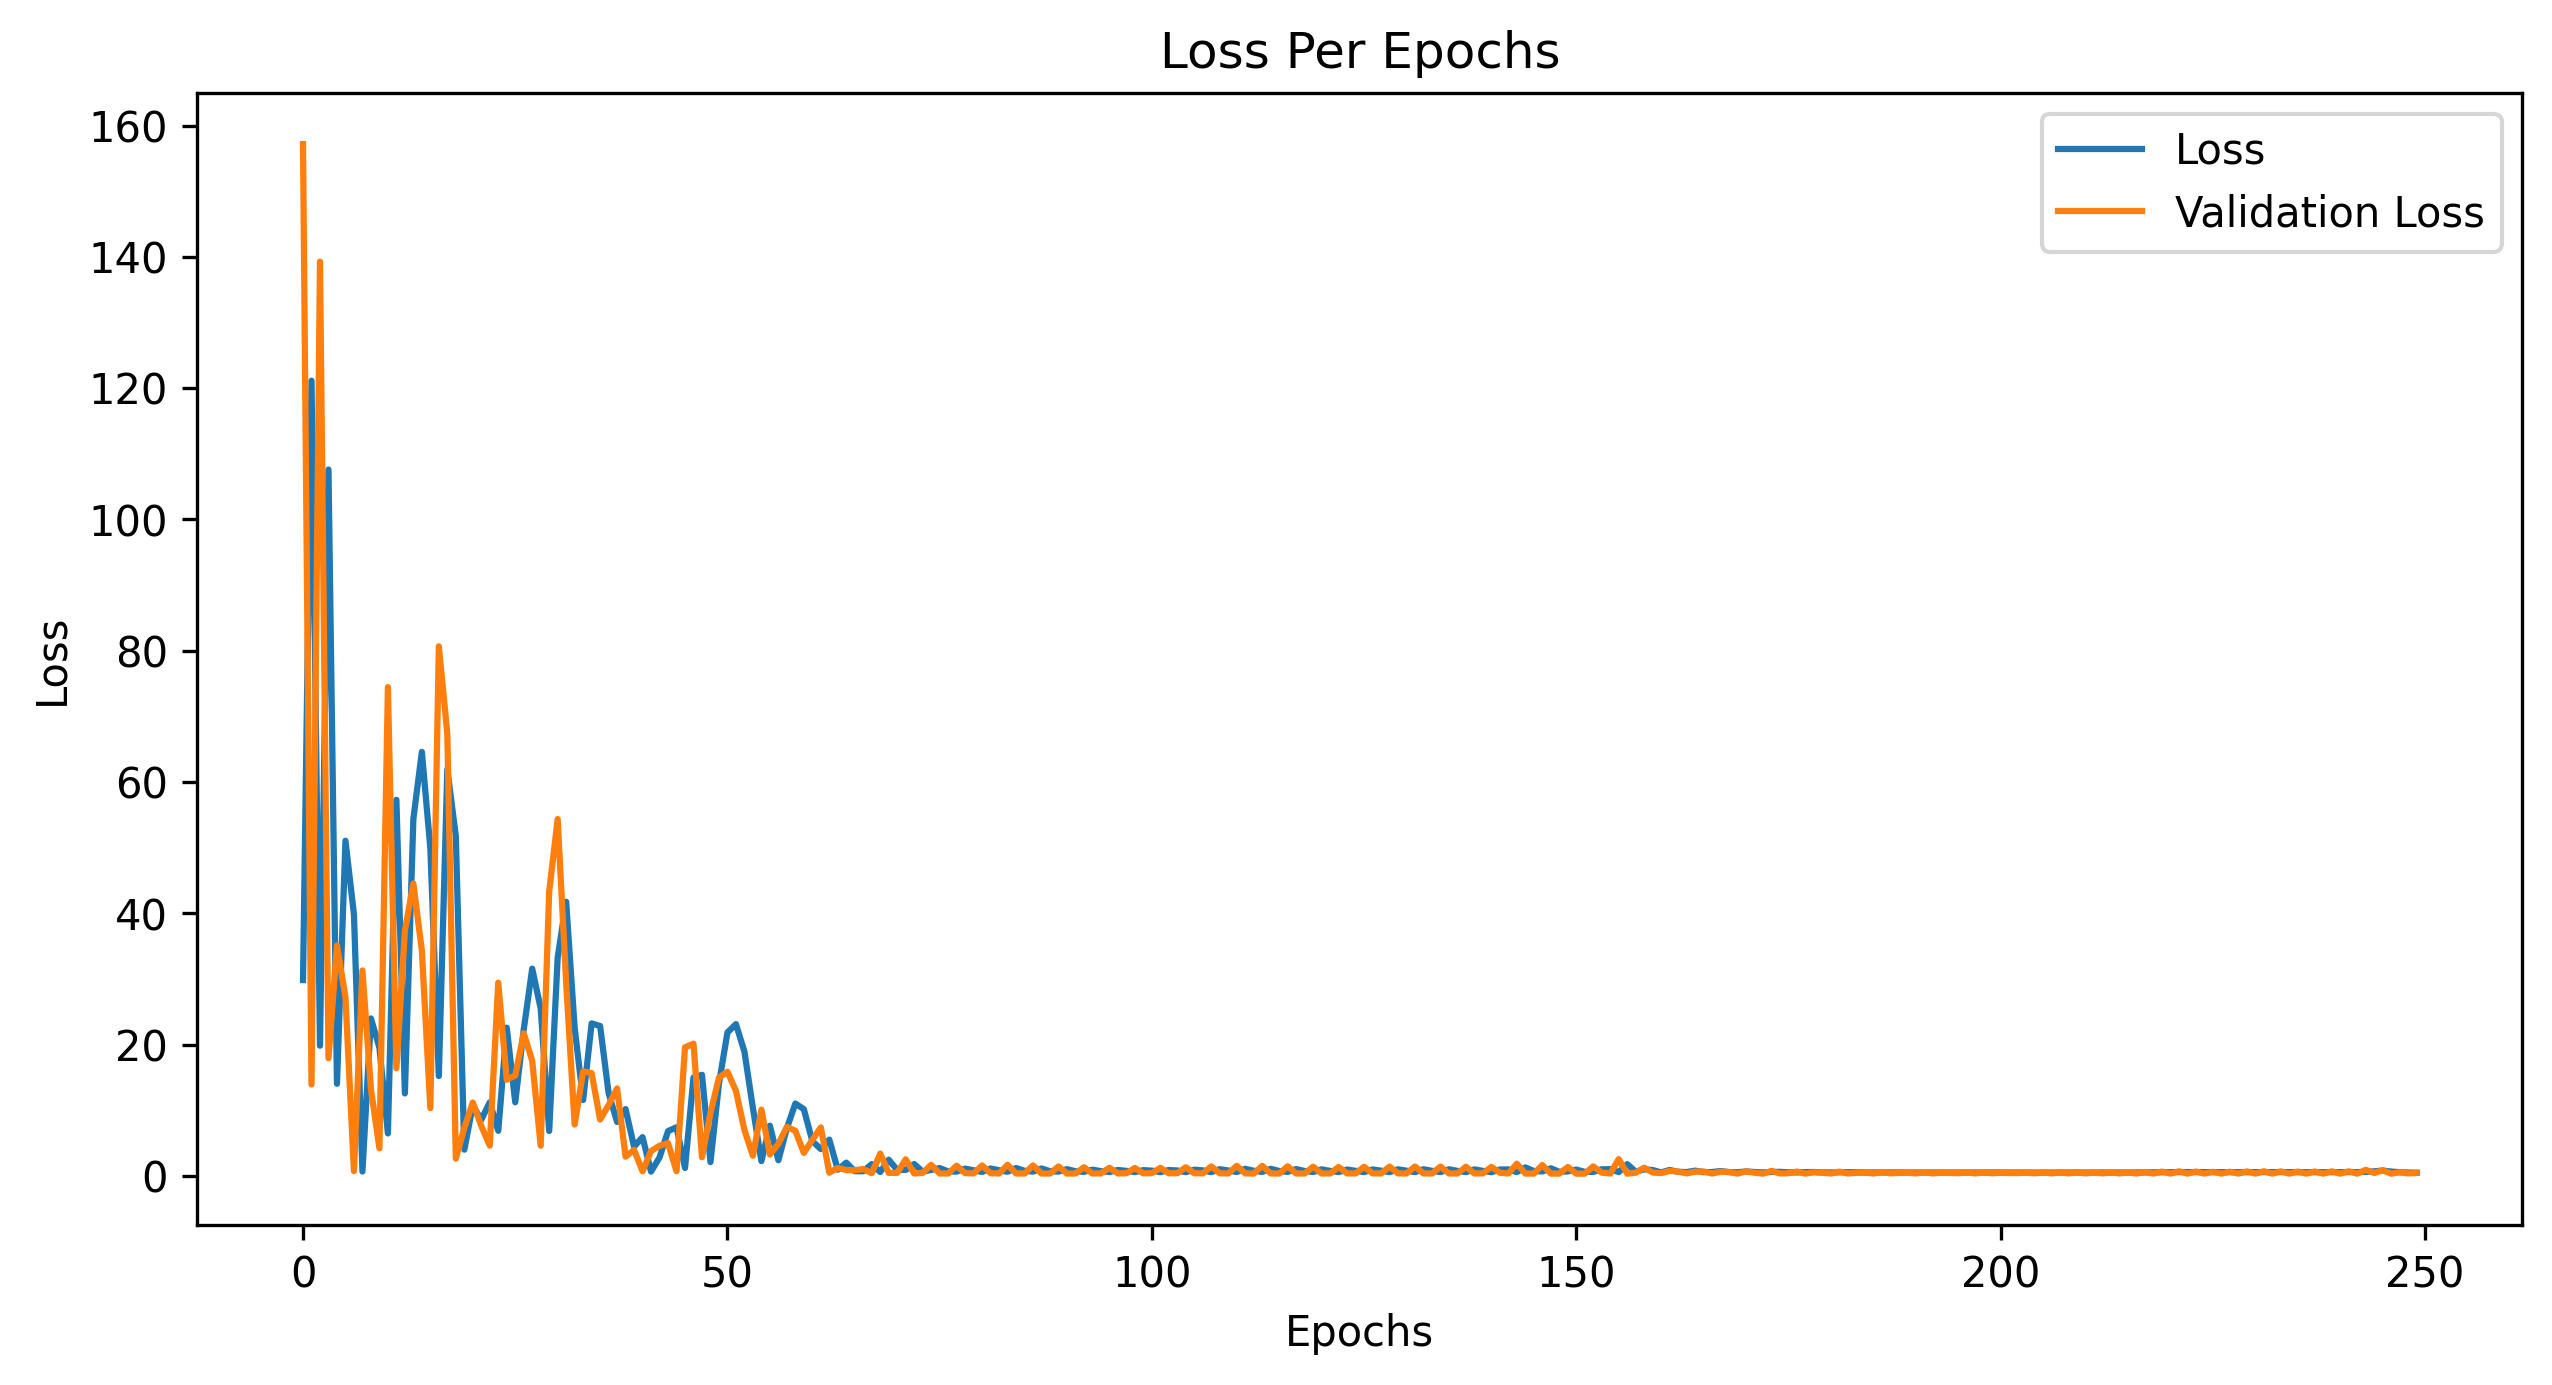

In [26]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [27]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

acc_m1 = ANN_Model.evaluate(X_test, y_test, verbose=0)
t0 = time.time()
y_pred_m1 = ANN_Model.predict(X_test, verbose=0)
pred_m1 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["ANN", acc_m1[1] * 100, train_m1, pred_m1]], columns=log_cols
)
log = log.append(log_entry)

In [28]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)


Number of samples for Train set : 28
Number of samples for Validation set : 8
Number of samples for Test set : 5
Shape of X Train (28, 26, 1)
Shape of X Test (5, 26)


In [29]:
CNN1D_Model = Sequential()
CNN1D_Model.add(
    Conv1D(
        256,
        5,
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(xTrain.shape[1], xTrain.shape[0]),
    )
)
CNN1D_Model.add(BatchNormalization())
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(128, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(64, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Flatten())
CNN1D_Model.add(Dense(units=1024, activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(Dense(units=10, activation="softmax"))
CNN1D_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 256)           36096     
                                                                 
 batch_normalization (BatchN  (None, 26, 256)          1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 256)           327936    
                                                                 
 dropout (Dropout)           (None, 13, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 256)          

In [30]:
CNN1D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [31]:
t0 = time.time()

CNN1D_Results = CNN1D_Model.fit(
    xTrain, yTrain, batch_size=64, epochs=250, validation_data=(xvalid, yvalid)
)

CNN1D_Model.save("Model2.h5")
print("CNN1D Model Saved")
train_hist_m2 = pd.DataFrame(CNN1D_Results.history)
train_m2 = round(time.time() - t0, 3)

Epoch 1/250


ValueError: ignored